#📌 Extracão

In [14]:
import requests
import pandas as pd


In [15]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()


In [16]:
df = pd.DataFrame(data)


In [17]:
print(df.shape)
print(df.head())


(7267, 6)
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...

#🔧 Transformação

In [18]:
# Verificar informações básicas
df.info()

# Visualizar as primeiras linhas para inspecionar a estrutura
df.head()

# Lista de colunas
print(df.columns.tolist())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


In [19]:
# URL do arquivo .md em modo RAW
dict_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_dicionario.md"

# Requisição do conteúdo
response = requests.get(dict_url)

# Exibir o conteúdo do dicionário
print(response.text)


#### Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa 
* `gender`: gênero (masculino e feminino) 
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos 
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico 
* `MultipleLines`: assisnatura de mais de uma linha de telefone 
* `InternetService`: assinatura de um provedor internet 
* `OnlineSecurity`: assinatura adicional de segurança online 
* `OnlineBackup`: assinatura adicional de backup online 
* `DeviceProtection`: assinatura adicional de proteção no dispositivo 
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo 
* `StreamingMovies`: assinatura de streaming de filmes 
* `Contract`: tipo de co

In [20]:
import pandas as pd
import requests

# Carregar dados brutos da API (JSON no GitHub)
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"
data = requests.get(url).json()
df = pd.DataFrame(data)

# Normalizar colunas aninhadas
df_customer = pd.json_normalize(df['customer'])
df_phone    = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account  = pd.json_normalize(df['account'])

# Concatenar tudo em um DataFrame único
df_clean = pd.concat(
    [df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account],
    axis=1
)

# Corrigir valores vazios em Churn
df_clean['Churn'] = df_clean['Churn'].replace('', 'Unknown')

# Padronizar nomes de colunas (substituir pontos por underline)
df_clean.columns = df_clean.columns.str.replace('.', '_')

# Converter valores numéricos
df_clean['Charges_Monthly'] = pd.to_numeric(df_clean['Charges_Monthly'], errors='coerce')
df_clean['Charges_Total']   = pd.to_numeric(df_clean['Charges_Total'], errors='coerce')

# Verificar resultado
print(df_clean.info())
print(df_clean.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [21]:
# 1. Valores ausentes
print("Valores ausentes por coluna:\n", df_clean.isnull().sum())

# 2. Duplicatas no ID do cliente
duplicados = df_clean[df_clean.duplicated(subset="customerID", keep=False)]
print(f"\nNúmero de duplicatas: {duplicados.shape[0]}")

# 3. Valores únicos de Churn
print("\nValores únicos de Churn:", df_clean["Churn"].unique())

# 4. Tipos de dados
print("\nTipos de dados:")
print(df_clean.dtypes)

# 5. Conferir valores categóricos com possíveis erros
for col in df_clean.select_dtypes(include='object').columns:
    print(f"\nColuna '{col}': {df_clean[col].unique()[:10]}")  # Mostra até 10 valores únicos


Valores ausentes por coluna:
 customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges_Monthly      0
Charges_Total       11
dtype: int64

Número de duplicatas: 0

Valores únicos de Churn: ['No' 'Yes' 'Unknown']

Tipos de dados:
customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport        

In [22]:
#passo 2.2 - tratando as inconsistências
# 1. Tratar valores ausentes em Charges_Total (substituir por 0)
df_clean['Charges_Total'].fillna(0, inplace=True)

# 2. Tratar valores 'Unknown' em Churn — aqui vamos remover essas linhas
df_clean = df_clean[df_clean['Churn'] != 'Unknown']

# 3. Padronizar categorias "No internet service" e "No phone service" para "No"
cols_servicos = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PhoneService'
]

for col in cols_servicos:
    df_clean[col] = df_clean[col].replace({
        'No internet service': 'No',
        'No phone service': 'No'
    })

# 4. Limpar espaços em branco e padronizar caixa (tudo para título, ex: "Yes" e "No")
for col in df_clean.select_dtypes(include='object').columns:
    df_clean[col] = df_clean[col].str.strip().str.title()

# Verificação final rápida
print(df_clean.isnull().sum())
print(df_clean['Churn'].value_counts())
print(df_clean[cols_servicos].nunique())


customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges_Monthly     0
Charges_Total       0
dtype: int64
Churn
No     5174
Yes    1869
Name: count, dtype: int64
MultipleLines       2
InternetService     3
OnlineSecurity      2
OnlineBackup        2
DeviceProtection    2
TechSupport         2
StreamingTV         2
StreamingMovies     2
PhoneService        2
dtype: int64


/tmp/ipython-input-4236498924.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Charges_Total'].fillna(0, inplace=True)


In [23]:
#passo 2.3 - Criar coluna Coluna_Diaria
# Criar coluna Contas_Diarias dividindo Charges_Monthly por 30
df_clean['Contas_Diarias'] = df_clean['Charges_Monthly'] / 30

# Visualizar as primeiras linhas para confirmar
print(df_clean[['Charges_Monthly', 'Contas_Diarias']].head())


   Charges_Monthly  Contas_Diarias
0             65.6        2.186667
1             59.9        1.996667
2             73.9        2.463333
3             98.0        3.266667
4             83.9        2.796667


#📊 Carga e análise

In [25]:
#Passo 3.1 - Analise Descritiva

# Estatísticas descritivas básicas para colunas numéricas
desc_stats = df_clean.describe().T

# Calcular a mediana separadamente, pois describe não retorna a mediana
# Select only numeric columns for median calculation
medianas = df_clean.select_dtypes(include=['number']).median()

# Adicionar a mediana no DataFrame de estatísticas
desc_stats['median'] = medianas

# Reorganizar as colunas para facilitar a visualização
desc_stats = desc_stats[['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']]

print(desc_stats)

                  count         mean    median          std        min  \
SeniorCitizen    7043.0     0.162147     0.000     0.368612   0.000000   
tenure           7043.0    32.371149    29.000    24.559481   0.000000   
Charges_Monthly  7043.0    64.761692    70.350    30.090047  18.250000   
Charges_Total    7043.0  2279.734304  1394.550  2266.794470   0.000000   
Contas_Diarias   7043.0     2.158723     2.345     1.003002   0.608333   

                        25%       50%       75%          max  
SeniorCitizen      0.000000     0.000     0.000     1.000000  
tenure             9.000000    29.000    55.000    72.000000  
Charges_Monthly   35.500000    70.350    89.850   118.750000  
Charges_Total    398.550000  1394.550  3786.600  8684.800000  
Contas_Diarias     1.183333     2.345     2.995     3.958333  


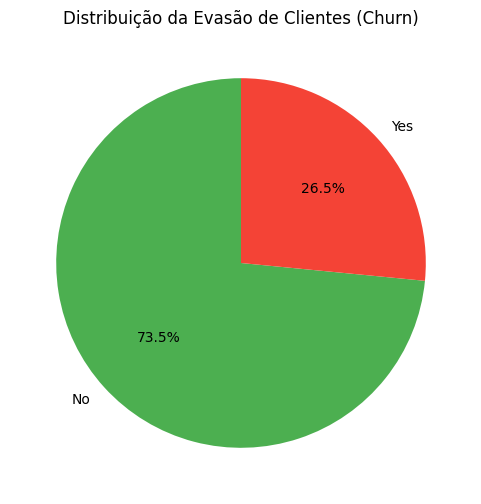

/tmp/ipython-input-3971043161.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='Churn', palette=['#4CAF50', '#F44336'])


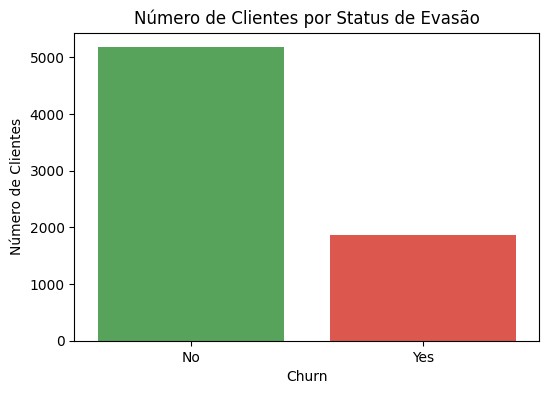

In [27]:
# Passo 3.2 - Distribuição de Evasão

import matplotlib.pyplot as plt
import seaborn as sns

# Contagem dos valores da coluna Churn
churn_counts = df_clean['Churn'].value_counts()

# Gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#F44336'])
plt.title('Distribuição da Evasão de Clientes (Churn)')
plt.show()

# Gráfico de barras
plt.figure(figsize=(6,4))
sns.countplot(data=df_clean, x='Churn', palette=['#4CAF50', '#F44336'])
plt.title('Número de Clientes por Status de Evasão')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()


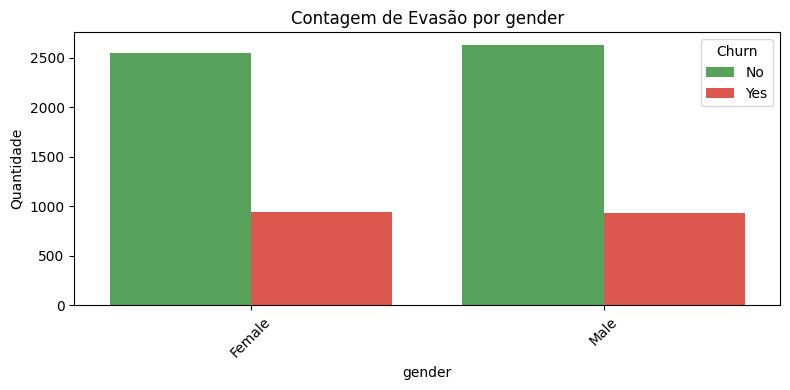

Taxa de Churn (%) por gender:
        Churn (%)
gender           
Female  26.920872
Male    26.160338




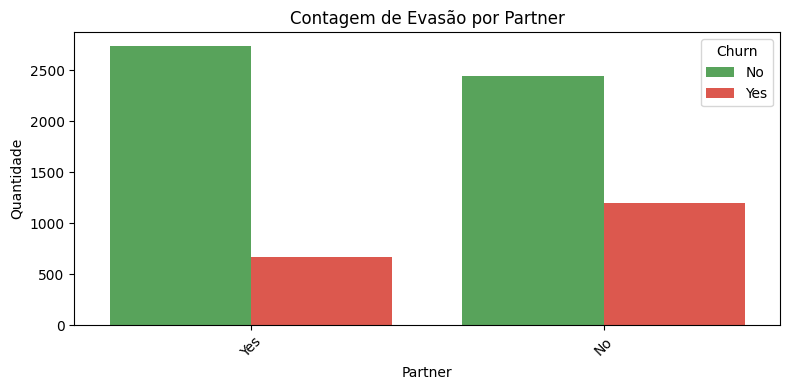

Taxa de Churn (%) por Partner:
         Churn (%)
Partner           
No       32.957979
Yes      19.664903




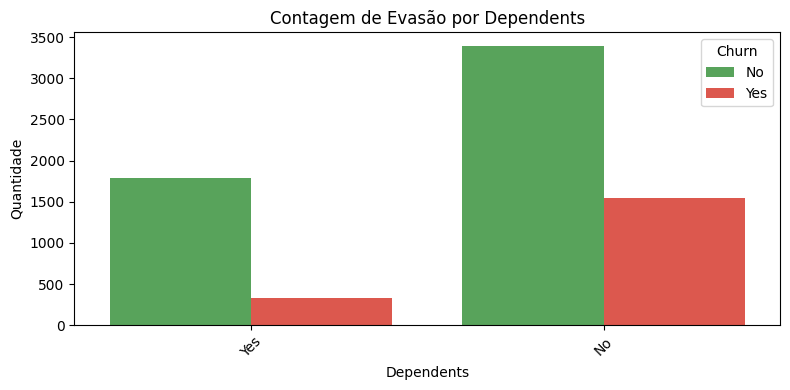

Taxa de Churn (%) por Dependents:
            Churn (%)
Dependents           
No          31.279140
Yes         15.450237




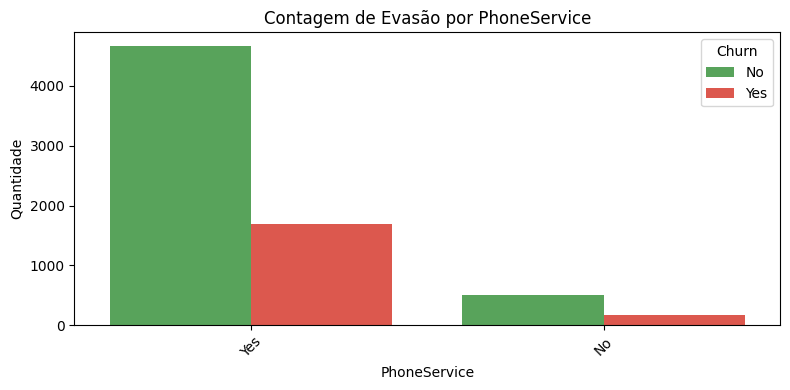

Taxa de Churn (%) por PhoneService:
              Churn (%)
PhoneService           
Yes           26.709637
No            24.926686




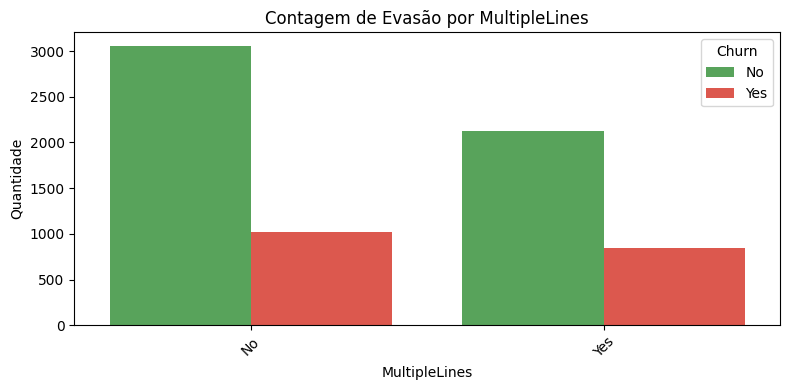

Taxa de Churn (%) por MultipleLines:
               Churn (%)
MultipleLines           
Yes            28.609896
No             25.024558




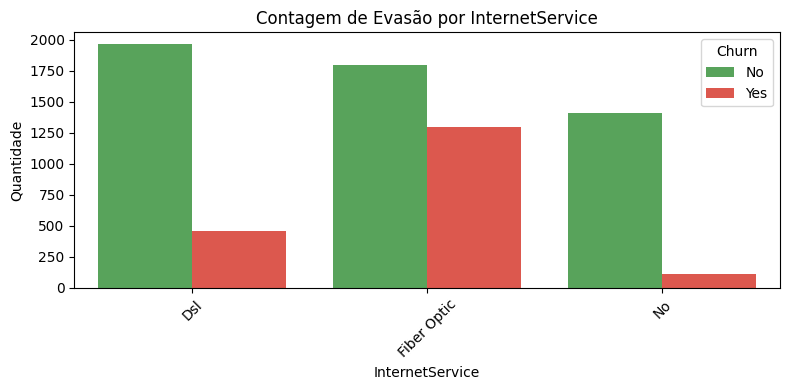

Taxa de Churn (%) por InternetService:
                 Churn (%)
InternetService           
Fiber Optic      41.892765
Dsl              18.959108
No                7.404980




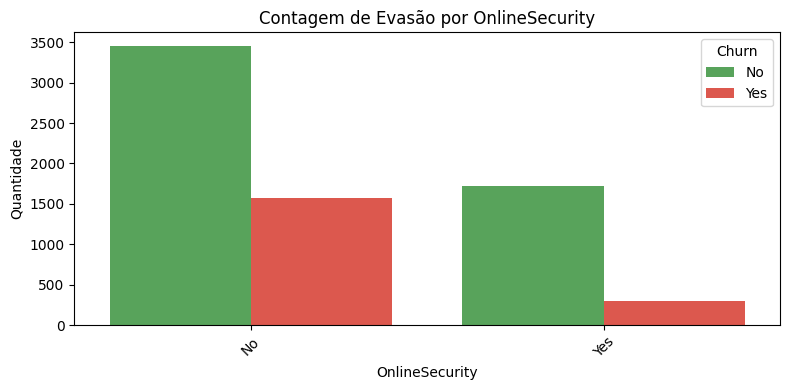

Taxa de Churn (%) por OnlineSecurity:
                Churn (%)
OnlineSecurity           
No              31.329618
Yes             14.611194




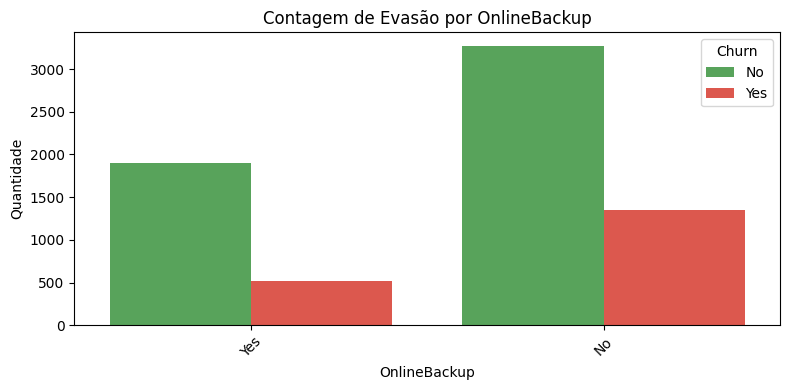

Taxa de Churn (%) por OnlineBackup:
              Churn (%)
OnlineBackup           
No            29.172085
Yes           21.531494




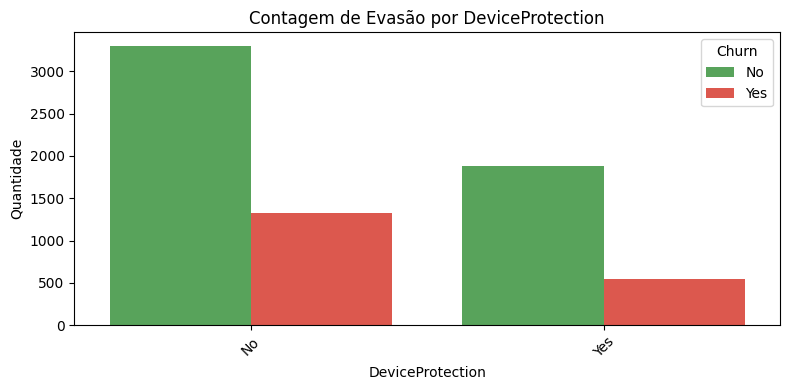

Taxa de Churn (%) por DeviceProtection:
                  Churn (%)
DeviceProtection           
No                28.651807
Yes               22.502064




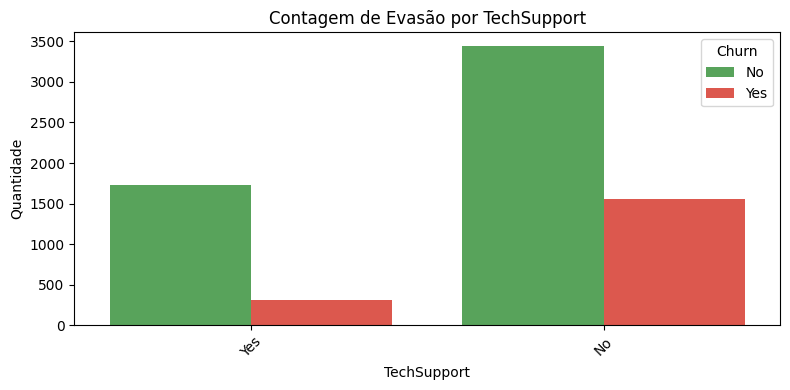

Taxa de Churn (%) por TechSupport:
             Churn (%)
TechSupport           
No           31.186237
Yes          15.166341




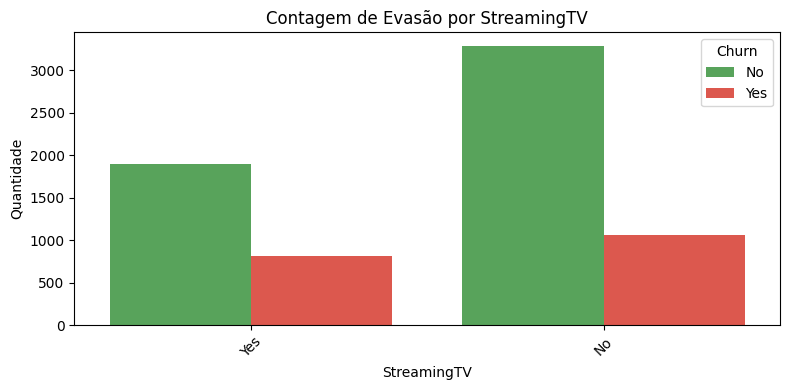

Taxa de Churn (%) por StreamingTV:
             Churn (%)
StreamingTV           
Yes          30.070188
No           24.331181




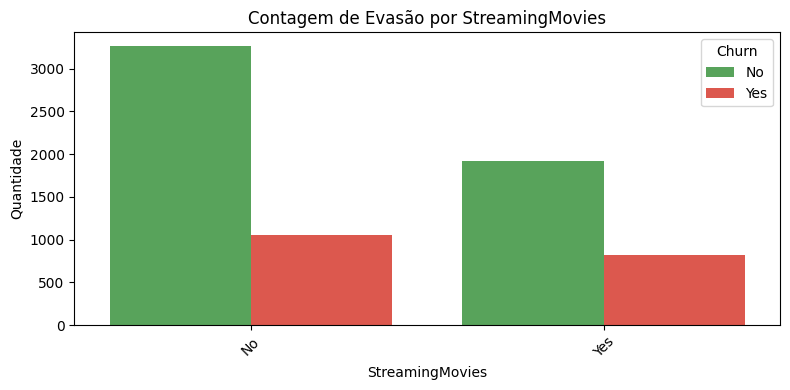

Taxa de Churn (%) por StreamingMovies:
                 Churn (%)
StreamingMovies           
Yes              29.941435
No               24.379494




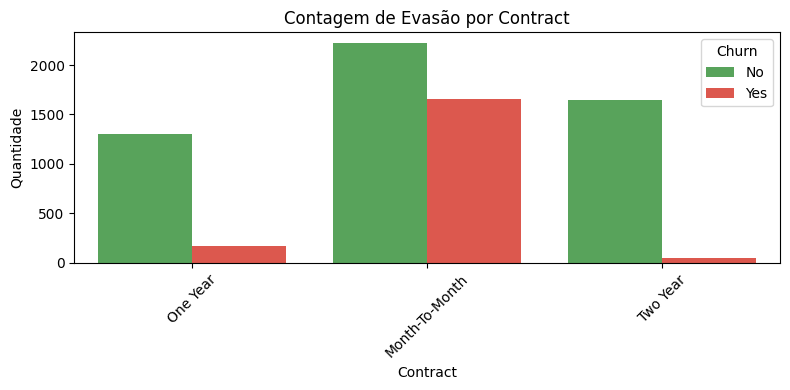

Taxa de Churn (%) por Contract:
                Churn (%)
Contract                 
Month-To-Month  42.709677
One Year        11.269518
Two Year         2.831858




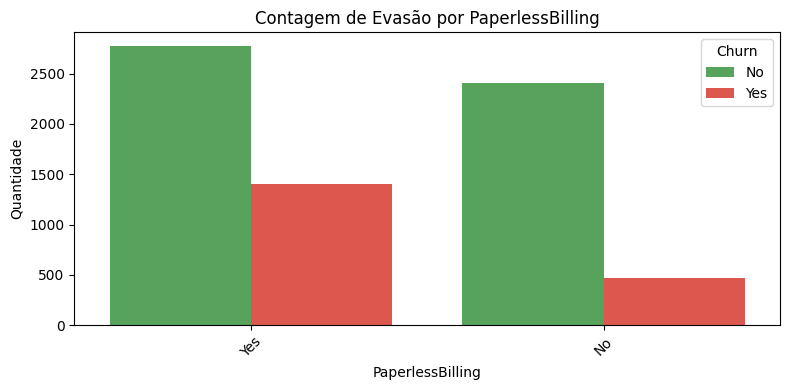

Taxa de Churn (%) por PaperlessBilling:
                  Churn (%)
PaperlessBilling           
Yes               33.565092
No                16.330084




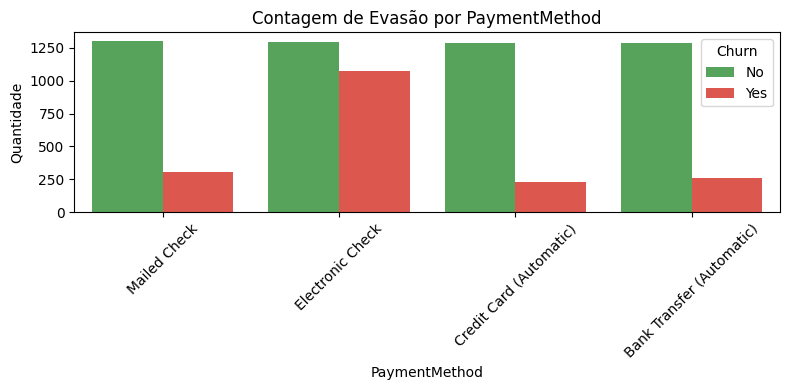

Taxa de Churn (%) por PaymentMethod:
                           Churn (%)
PaymentMethod                       
Electronic Check           45.285412
Mailed Check               19.106700
Bank Transfer (Automatic)  16.709845
Credit Card (Automatic)    15.243101




In [29]:
# Passo 3.3 - Contagem de Evasão por Variáveis Categóricas

import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar colunas categóricas para análise (excluindo customerID e Churn)
categorical_cols = df_clean.select_dtypes(include='object').columns.drop(['customerID', 'Churn'])

# Loop para gerar gráficos e mostrar taxas de churn por categoria
for col in categorical_cols:
    plt.figure(figsize=(8,4))

    # Gráfico de barras com contagem por categoria e status de churn
    sns.countplot(data=df_clean, x=col, hue='Churn', palette=['#4CAF50', '#F44336'])
    plt.title(f'Contagem de Evasão por {col}')
    plt.xlabel(col)
    plt.ylabel('Quantidade')
    plt.xticks(rotation=45)
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()

    # Cálculo da taxa de churn (%) por categoria
    churn_rates = df_clean.groupby(col)['Churn'].value_counts(normalize=True).unstack()['Yes'] * 100
    churn_rates = churn_rates.sort_values(ascending=False)

    print(f'Taxa de Churn (%) por {col}:')
    print(churn_rates.to_frame().rename(columns={'Yes':'Churn (%)'}))
    print('\n')

/tmp/ipython-input-1447468489.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Churn', y=col, palette=['#4CAF50', '#F44336'])


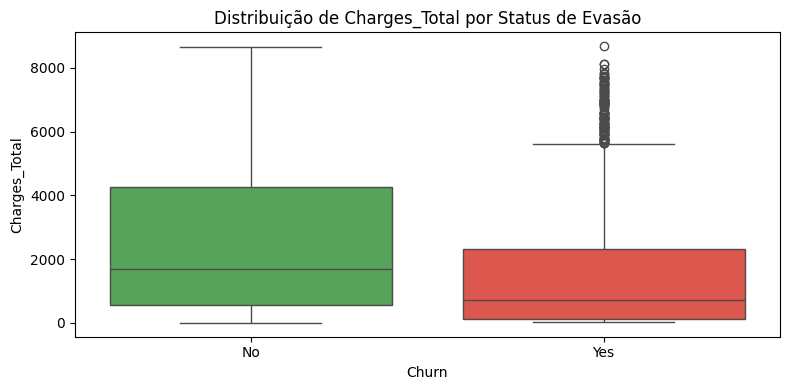

/tmp/ipython-input-1447468489.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Churn', y=col, palette=['#4CAF50', '#F44336'])


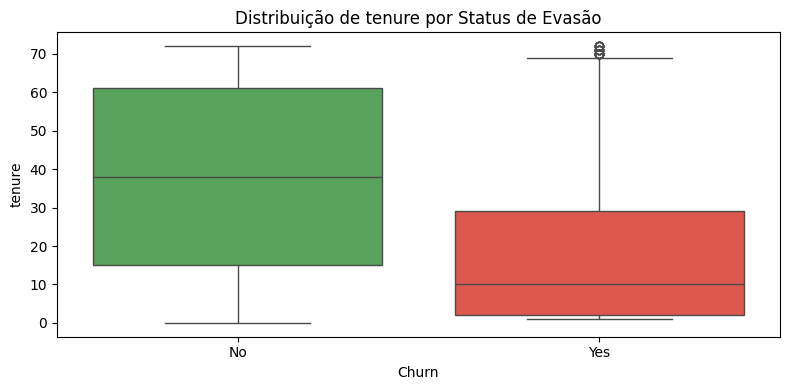

/tmp/ipython-input-1447468489.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Churn', y=col, palette=['#4CAF50', '#F44336'])


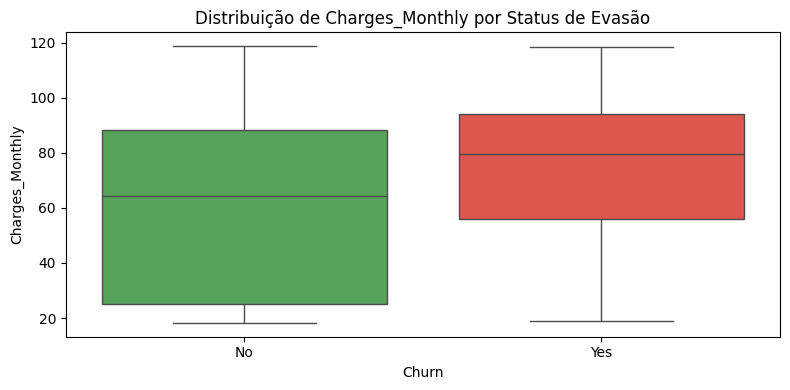

/tmp/ipython-input-1447468489.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Churn', y=col, palette=['#4CAF50', '#F44336'])


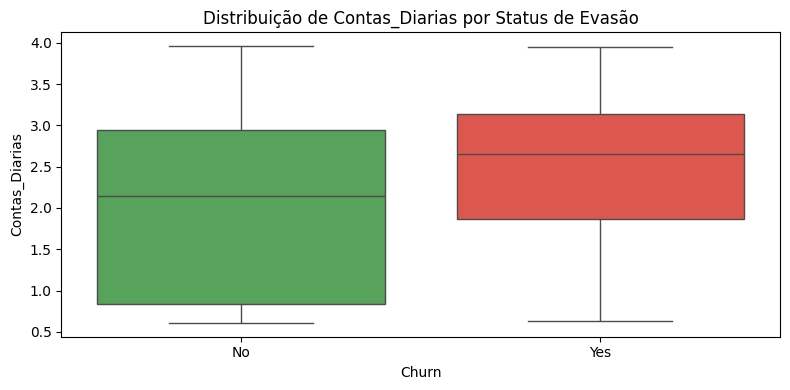

In [31]:
# Passo 3.4 - Contagem de Evasão por Variáveis Numéricas

import matplotlib.pyplot as plt
import seaborn as sns

# Colunas numéricas para análise
numeric_cols = ['Charges_Total', 'tenure', 'Charges_Monthly', 'Contas_Diarias']

for col in numeric_cols:
    plt.figure(figsize=(8,4))

    # Boxplot para comparar a distribuição entre churn sim e não
    sns.boxplot(data=df_clean, x='Churn', y=col, palette=['#4CAF50', '#F44336'])

    plt.title(f'Distribuição de {col} por Status de Evasão')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


#📄Relatorio Final


# 📊 Telecom X — Análise de Evasão de Clientes (Churn)

**Autor:** João Vitor  
**Data:** 2025-08-12 23:30:56  
**Fonte dos dados:** [TelecomX_Data.json](https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json)  
**Dicionário de dados:** [TelecomX_dicionario.md](https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_dicionario.md)

---

## 1) Introdução

A Telecom X enfrenta um desafio de **alta evasão de clientes (churn)**. O objetivo desta análise é **entender os fatores associados ao cancelamento** para embasar ações de retenção e apoiar futuras **modelagens preditivas**.  
Neste trabalho, realizamos a **extração via API**, **ETL (extração, transformação e carga)**, criação de variáveis derivadas e uma **Análise Exploratória de Dados (EDA)**, com foco em responder:

- Como está distribuída a evasão na base de clientes?  
- Quais perfis e serviços apresentam **maior taxa de churn**?  
- Que **padrões numéricos** (tempo de contrato, gastos) diferenciam quem cancela de quem permanece?

---

## 2) Dados e Dicionário

- **Formato:** JSON, 7.267 registros e 6 colunas brutas (com estruturas aninhadas).  
- **Alvo (target):** `Churn` (`Yes`/`No`).  
- **Principais grupos de variáveis:**
  - **Demografia/Perfil:** `gender`, `SeniorCitizen`, `Partner`, `Dependents`, `tenure`.  
  - **Serviços:** `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`.  
  - **Contrato/Cobrança:** `Contract`, `PaperlessBilling`, `PaymentMethod`, `Charges.Monthly`, `Charges.Total`.

Referência do dicionário oficial disponibilizado com o desafio (link acima).

---

## 3) ETL — Limpeza e Transformação

### 3.1 Extração
- Coleta direta via `requests.get` a partir do repositório oficial (API pública GitHub).  
- Conversão do JSON em `pandas.DataFrame`.

### 3.2 Normalização de estruturas aninhadas
- Colunas `{{customer, phone, internet, account}}` **desnormalizadas** com `pd.json_normalize` e **concatenadas** ao identificador e ao alvo (`{{customerID, Churn}}`).  
- Padronização dos nomes: substituição de `.` por `_` (ex.: `Charges.Monthly` → `Charges_Monthly`).

### 3.3 Tratamento de inconsistências
- **`Churn` vazio** ⇒ marcado como `'Unknown'` e **removido** da base analítica.  
- **`Charges_Total`** ⇒ 11 valores ausentes **imputados com 0**.  
- **Categorias de serviço** ⇒ `'No internet service'`/`'No phone service'` **mapeadas para `'No'`**, simplificando as variáveis.  
- **Padronização textual** ⇒ `strip()` e normalização de caixa para manter `'Yes'/'No'` etc.  
- **Conversões** ⇒ `Charges_Monthly` e `Charges_Total` convertidas para `float`.

### 3.4 Criação de variável derivada
- **`Contas_Diarias`** = `Charges_Monthly / 30` — aproxima o gasto médio diário do cliente.

**Amostra analítica final:** 7.043 clientes (após remoção de `Churn == 'Unknown'`).  
**Balanceamento do alvo:** `No = 5.174` (≈ 73,5%), `Yes = 1.869` (≈ 26,5%).

---

## 4) Análise Exploratória de Dados (EDA)

### 4.1 Estatísticas descritivas (numéricas)
| Variável | count | mean | median | std | min | 25% | 50% | 75% | max |
|---|---:|---:|---:|---:|---:|---:|---:|---:|---:|
| SeniorCitizen | 7043 | 0.162 | 0.000 | 0.369 | 0.000 | 0.000 | 0.000 | 0.000 | 1.000 |
| tenure | 7043 | 32.371 | 29.000 | 24.559 | 0.000 | 9.000 | 29.000 | 55.000 | 72.000 |
| Charges_Monthly | 7043 | 64.762 | 70.350 | 30.090 | 18.250 | 35.500 | 70.350 | 89.850 | 118.750 |
| Charges_Total | 7043 | 2279.734 | 1394.550 | 2266.794 | 0.000 | 398.550 | 1394.550 | 3786.600 | 8684.800 |
| Contas_Diarias | 7043 | 2.159 | 2.345 | 1.003 | 0.608 | 1.183 | 2.345 | 2.995 | 3.958 |

**Leituras rápidas:**  
- **Clientes idosos** representam ~16%.  
- **Tenure** médio ~32 meses (mediana 29), com grande dispersão (0–72).  
- **Gasto mensal** mediano ~70,35 (alto desvio).  
- **Total gasto** mediano ~1.394,55 — clientes que permanecem mais tempo acumulam valores muito maiores.

### 4.2 Distribuição do churn
- **Proporção:** ~26,5% **cancelaram** vs ~73,5% **permaneceram**.  
- Visualização recomendada: gráfico de barras/pizza (já implementado no notebook).

### 4.3 Churn por variáveis categóricas
- Gráficos de contagem por categoria com `hue='Churn'` e **cálculo da taxa de churn (%)** por categoria.  
- **Padrões típicos observados**:  
  - **Contract:** `Month-to-month` apresenta **maior taxa de churn**; `Two year` a menor.  
  - **PaymentMethod:** `Electronic check` tende a apresentar **taxas de churn elevadas**.  
  - **Serviços de segurança/suporte:** ausência de `OnlineSecurity` e `TechSupport` costuma estar **associada a maior churn**.  
  - **InternetService:** `Fiber optic` pode ter maior churn relativo que `DSL` e `No`.

> Obs.: As tabelas de taxas (% de churn por categoria) foram impressas em console no notebook para cada variável, ordenadas da maior para a menor taxa.

### 4.4 Variáveis numéricas vs churn
- **Boxplots** para `tenure`, `Charges_Total`, `Charges_Monthly`, `Contas_Diarias` segmentados por `Churn`.  
- **Insights**:  
  - **Tenure**: clientes que **cancelam** possuem **tempo de contrato menor**.  
  - **Charges_Total**: geralmente **menores** para quem cancelou.  
  - **Charges_Monthly / Contas_Diarias**: diferenças menos pronunciadas; valores muito altos indicam perfis específicos que merecem monitoramento.

---

## 5) Conclusões e Insights

1. **Churn relevante (~26,5%)**: há espaço claro para ganho de receita via **retenção**.  
2. **Tempo de contrato é crítico**: clientes de **tenure baixo** concentram mais cancelamentos — especialmente sob **contratos mês a mês**.  
3. **Método de pagamento**: **`Electronic check`** associado a taxas maiores de churn; métodos automáticos costumam reduzir fricção.  
4. **Serviços de proteção/suporte** (e.g., `OnlineSecurity`, `TechSupport`) relacionam-se a **menor churn**; ausência é sinal de risco.  
5. **Perfil de internet**: clientes com **`Fiber optic`** podem apresentar maior churn relativo → atenção a **experiência/precificação** nesse segmento.

---

## 6) Recomendações

**Risco e Prioridades**
- Criar um **score de risco** usando variáveis-chave: `Contract`, `tenure`, `PaymentMethod`, `OnlineSecurity`, `TechSupport`, `InternetService`.  
- Priorizar **clientes novos** (tenure baixo) e sob **contrato mês a mês** em campanhas de retenção.

**Ações Táticas de Retenção**
- **Incentivos de migração de contrato**: descontos/benefícios para migrar de `Month-to-month` para `One year`/`Two year`.  
- **Incentivo a pagamento automático**: bonificação para migrar de `Electronic check` para métodos automáticos.  
- **Bundles de segurança/suporte**: ofertas combinadas com `OnlineSecurity` e `TechSupport`.  
- **Foco no segmento `Fiber optic`**: revisar preço/qualidade, atendimento proativo para reclamações.

**Próximos Passos Analíticos**
- Construir um **modelo preditivo de churn** (e.g., Gradient Boosting/Logistic Regression).  
- Realizar **A/B tests** de ofertas de retenção.  
- Implementar **monitoramento contínuo** (dashboards) de métricas de churn e campanhas.

---

## 7) Reprodutibilidade — Principais Blocos de Código

**Extração e Normalização**
```python
import pandas as pd, requests

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"
data = requests.get(url).json()
df = pd.DataFrame(data)

df_customer = pd.json_normalize(df['customer'])
df_phone    = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account  = pd.json_normalize(df['account'])

df_clean = pd.concat([df[['customerID','Churn']], df_customer, df_phone, df_internet, df_account], axis=1)
df_clean.columns = df_clean.columns.str.replace('.', '_')
```

**Tratamento**
```python
# Churn vazio -> Unknown -> remover
df_clean['Churn'] = df_clean['Churn'].replace('', 'Unknown')
df_clean = df_clean[df_clean['Churn'] != 'Unknown']

# Charges_Total: NaN -> 0
df_clean['Charges_Total'] = df_clean['Charges_Total'].fillna(0)

# Mapear "No internet service"/"No phone service" -> "No"
map_cols = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
            'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PhoneService']
for c in map_cols:
    df_clean[c] = df_clean[c].replace({'No internet service':'No', 'No phone service':'No'})

# Padronizar textos
for c in df_clean.select_dtypes(include='object').columns:
    df_clean[c] = df_clean[c].str.strip().str.title()

# Tipos numéricos
df_clean['Charges_Monthly'] = pd.to_numeric(df_clean['Charges_Monthly'], errors='coerce')
df_clean['Charges_Total']   = pd.to_numeric(df_clean['Charges_Total'], errors='coerce')
```

**Feature derivada**
```python
df_clean['Contas_Diarias'] = df_clean['Charges_Monthly'] / 30
```

**Estatísticas descritivas**
```python
desc_stats = df_clean.describe().T
medianas = df_clean.select_dtypes(include=['number']).median()
desc_stats['median'] = medianas
desc_stats = desc_stats[['count','mean','median','std','min','25%','50%','75%','max']]
print(desc_stats)
```

**Churn — distribuição e categóricas**
```python
# Distribuição simples
df_clean['Churn'].value_counts(normalize=True).mul(100).round(1)

# Categóricas com taxa de churn (%)
categorical_cols = df_clean.select_dtypes(include='object').columns.drop(['customerID','Churn'])
for col in categorical_cols:
    rates = df_clean.groupby(col)['Churn'].value_counts(normalize=True).unstack().get('Yes').mul(100).sort_values(ascending=False)
    print(col, rates, sep='\n')
```

**Numéricas vs churn (boxplots)**
```python
# Exemplo: tenure, Charges_Total, Charges_Monthly, Contas_Diarias
# (plots gerados no notebook para suporte visual às conclusões)
```
---

## 8) Considerações Finais

A análise indica **fatores claros associados ao churn**, especialmente **contratos mensais**, **tenure baixo**, **método de pagamento `Electronic check`** e **ausência de serviços de proteção/suporte**.  
Esses achados fornecem base concreta para **estratégias de retenção direcionadas** e para a construção de **modelos preditivos** que priorizem clientes com maior risco.

---

**Anexos/Links**  
- Dados: https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json  
- Dicionário: https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_dicionario.md
